In [1]:
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy import signal
import numpy as np

In [3]:
def create_hrf(p,TR,fmri_T):
    dt = TR/fmri_T
    u = np.empty(int(p[6]/dt),dtype=np.float64)
    for i in np.arange(u.size):
        u[i] = i - p[5]/dt
    u = u/max(u) * p[6]
    hrf = gamma.pdf(u,p[0]/p[2],dt/p[2]) - gamma.pdf(u,p[1]/p[3],dt/p[3])/p[4]
    points = np.empty(int(p[6]/TR),dtype=np.int)
    for i in np.arange(points.size):
        points[i] = i*fmri_T + 1
    hrf = hrf/sum(hrf)
    return points,u,hrf

In [4]:
#1 peak
#2 undershoot
#3 dispersion of response
#4 dispersion of undershoot
#5 ratio response to undershoot
#6 delay
#7 length
parameters = np.array([6,16,1,1,6,0,32])
# TR
TR = 1
# number of points per second
fmri_T = 16

In [5]:
samples,points,hrf = create_hrf(parameters,TR,fmri_T)

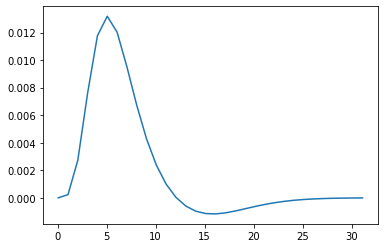

In [7]:
plt.plot(points[samples],hrf[samples])